In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
year = 2012 # select the year 
month = 12   # select the month (1 to 12)

# generate the data file path
datapath = os.path.join('..','data', f'{year}-{month:02}-power-survey-london.csv')

# load the data file into the variable 'data'
data = pd.read_csv(datapath)

In [3]:
# preview data
data.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,L_count,M_count,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma
0,2012-12-01 00:00:00,49.712,4.840,27.291,73.613,305.244000,114.796,32.145,80.644,8.107,...,264,96,125,87,86,706,38,0.229359,4410,1011.474999
1,2012-12-01 00:30:00,42.270,3.919,24.144,61.243,334.766999,102.585,31.681,69.007,6.793,...,264,96,125,87,87,706,38,0.235855,4412,1040.591999
2,2012-12-01 01:00:00,34.621,3.012,21.683,55.938,310.025999,88.111,33.461,61.230,6.579,...,264,96,125,87,87,706,38,0.214772,4412,947.573999
3,2012-12-01 01:30:00,28.279,2.805,18.645,51.647,277.087000,81.909,29.419,54.084,5.164,...,264,96,125,87,87,706,38,0.190346,4412,839.808000
4,2012-12-01 02:00:00,30.286,2.240,16.981,45.070,255.998000,77.893,23.578,49.348,4.676,...,264,96,125,87,87,706,38,0.173234,4412,764.308001


In [4]:
data['datetime'] = pd.to_datetime( data['datetime'] )

<IPython.core.display.Javascript object>


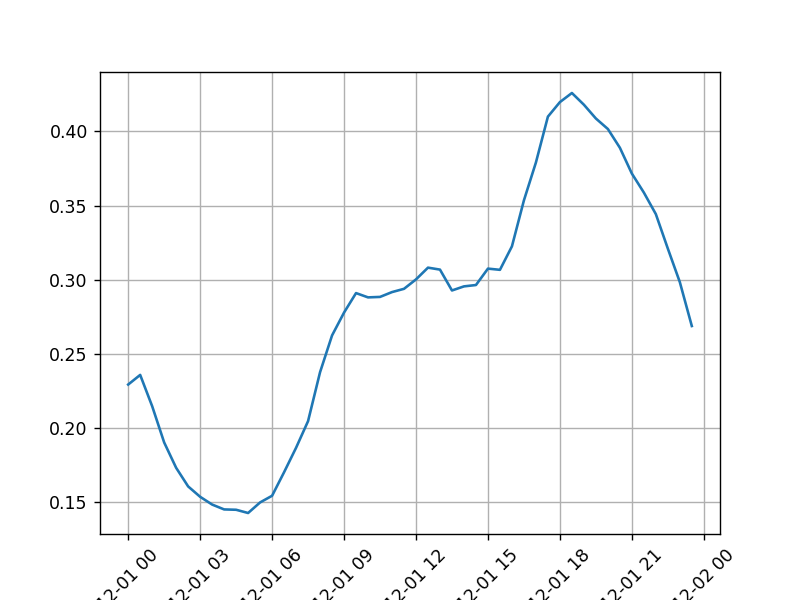

C:\Users\pragy\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([734838.   , 734838.125, 734838.25 , 734838.375, 734838.5  ,
        734838.625, 734838.75 , 734838.875, 734839.   ]),
 <a list of 9 Text xticklabel objects>)

In [5]:
start_day = 1  # day of the month to begin with 
end_day = 1   # day of the month to end with

# extract indices for interesting data
zoom_range = data['datetime'].apply(lambda date : start_day <= date.day and date.day <= end_day) 
interesting = data.loc[zoom_range]


# plot region of interest
plt.grid()
plt.plot( interesting['datetime'], interesting['mean'] )
plt.xticks(rotation=45) # make dates readable